In [2]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import time

In [3]:

def get_amazon_reviews(product_url, retries=3):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Connection': 'keep-alive',
        'DNT': '1',  # Do Not Track Request Header
        'Upgrade-Insecure-Requests': '1'
    }

    for attempt in range(retries):
        response = requests.get(product_url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            reviews = soup.find_all('div', {'data-hook': 'review-collapsed'})
            review_texts = [review.text.strip() for review in reviews]
            return review_texts
        else:
            print(f"Attempt {attempt + 1} failed with status code {response.status_code}. Retrying...")
            time.sleep(2)  # Wait for 2 seconds before retrying

    print("Failed to retrieve the page after several attempts.")
    return []

In [4]:
def analyze_sentiments(reviews):
    positive_reviews = []
    negative_reviews = []

    for review in reviews:
        analysis = TextBlob(review)
        if analysis.sentiment.polarity > 0:
            positive_reviews.append(review)
        else:
            negative_reviews.append(review)

    return positive_reviews, negative_reviews

Number of positive reviews: 11
Number of negative reviews: 2


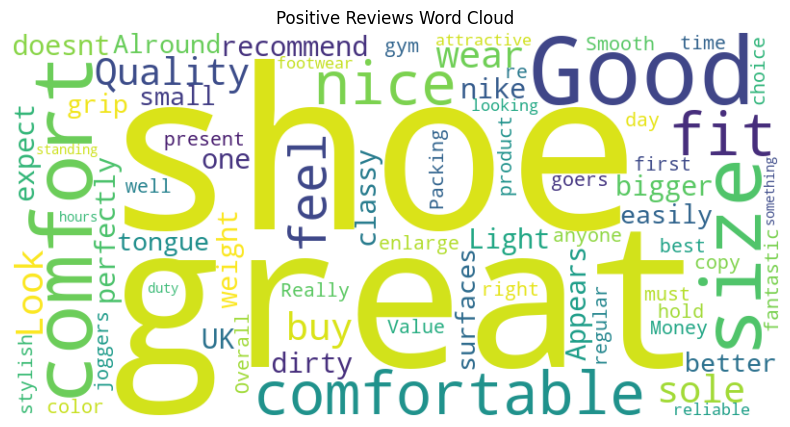

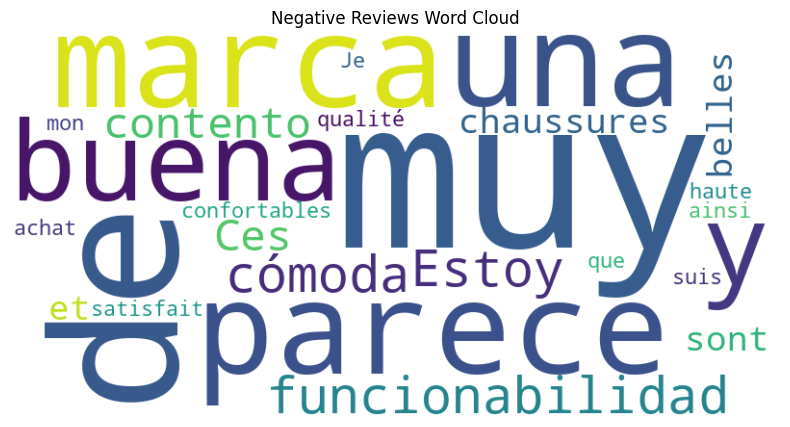

In [5]:
def generate_word_cloud(reviews, title):
    text = ' '.join(reviews)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
product_url ="https://www.amazon.in/Nike-Mens-Revolution-Black-Running/dp/B0C8TH2TXS/ref=sr_1_1?crid=2I7TYVKI2T2FP&dib=eyJ2IjoiMSJ9.2aKf0iduGvnOPQsDJ93uw-XMYWV6ynKlylOE4X2ideUNTBVdQ2oAx1avWWuFNQqZQEt3OGc7nf-lFivkYlB_F6ZU6KmGJU9Dp0IjemGlQIGjOUEDgOL5ORvj1T55PHUiZnyziY9qlD-B4J8DuDp2WVfpFzyjqsr8q_mDkchORrQttaHATp_iSPXsutlnh2BGEU4-Wa-59r47qbP23XK3s9wSIgUG8OHCiN9JIyBi8AzIhYdVR2bdJptyhTO54vJpoQoDgCXVSa4LuZH7_MPzjY1rm5aUE6Tpg8Rts4gwXnA.S5-T39LcK1tSdwVysGLmtm-lsW-M_WyDZbql-2NOjIE&dib_tag=se&keywords=shoes+for+man+nike&qid=1722436554&sprefix=shoes+for+man+%2Cspecialty-aps%2C207&sr=8-1"
reviews = get_amazon_reviews(product_url)
if reviews:
    positive_reviews, negative_reviews = analyze_sentiments(reviews)

    print(f"Number of positive reviews: {len(positive_reviews)}")
    print(f"Number of negative reviews: {len(negative_reviews)}")

    generate_word_cloud(positive_reviews, 'Positive Reviews Word Cloud')
    
    generate_word_cloud(negative_reviews, 'Negative Reviews Word Cloud')
else:
    print("No reviews found or failed to retrieve reviews.")